<a href="https://colab.research.google.com/github/nmercado1986/jupyter-notebooks/blob/master/covid-ar.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Estudiando la evolución del COVID-19 en Argentina

## 1. Instalamos dependencias

In [1]:
!pip install pandas matplotlib

In [2]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
matplotlib.rcParams['figure.figsize'] = (10,6)

In [3]:
print("Pandas version: {}".format(pd.__version__))
print("Matplotlib version: {}".format(matplotlib.__version__))

Pandas version: 1.0.5
Matplotlib version: 3.2.2


## 2. Un vistazo inicial
Los datos están en el dataframe `df`. Como vemos, están indexados por fecha. Gracias a la gente de [Sistemas Mapache](https://github.com/SistemasMapache/Covid19arData) por estos datos.
Parecen tener la ventaja además de contar con un feature que es el índice ordinal de día de la pandemia, de cuarentena.

In [4]:
url = 'https://docs.google.com/spreadsheets/d/16-bnsDdmmgtSxdWbVMboIHo5FRuz76DBxsz_BbsEVWA/export?format=csv&id=16-bnsDdmmgtSxdWbVMboIHo5FRuz76DBxsz_BbsEVWA&gid=0'
df = pd.read_csv(url)
print(df.head())

       fecha  dia_inicio  ...     observacion covid19argentina_admin_level_4
0  2/03/2020           1  ...  no hay informe                capital-federal
1  3/03/2020           2  ...  no hay informe                        no-data
2  4/03/2020           3  ...  no hay informe                        no-data
3  5/03/2020           4  ...             NaN                   buenos-aires
4  6/03/2020           5  ...             NaN                        no-data

[5 rows x 19 columns]


> ⚠️ **OJO**: Los datos no están agregados por fecha, hacia el final del dataset vemos muchas entradas para el mismo día.
Viendo con atención, parece que están agrupados por provincia/día

In [5]:
print(df.tail())

           fecha  dia_inicio  ...  observacion covid19argentina_admin_level_4
2987  18/08/2020         167  ...          NaN                            NaN
2988  18/08/2020         167  ...          NaN                            NaN
2989  18/08/2020         167  ...          NaN                            NaN
2990  18/08/2020         167  ...          NaN                            NaN
2991  18/08/2020         167  ...          NaN                            NaN

[5 rows x 19 columns]


**Empecemos ploteando la cantidad de casos y fallecidos por dia de la pandemia.**

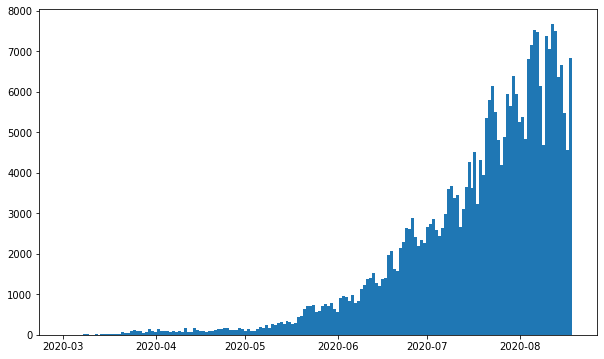

In [6]:
#print(df)
df.fecha = pd.to_datetime(df.fecha, format='%d/%m/%Y')
porDia = df.nue_casosconf_diff.groupby(df.fecha).sum()
porDia = df.resample('D', on='fecha').sum()
plt.bar(porDia.index, porDia.nue_casosconf_diff, width=1);

## Ploteamos el MA para las últimas dos y tres semanas

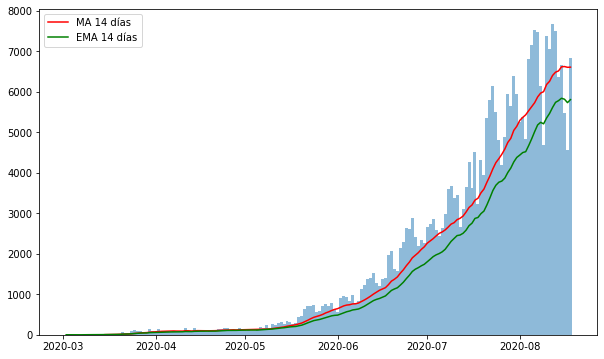

In [7]:
plt.bar(porDia.index, porDia.nue_casosconf_diff, width=1, alpha=.5);
# Calculamos el MA
ma14 = porDia.nue_casosconf_diff.rolling(14)
ema14 = porDia.nue_casosconf_diff.ewm(14)
plt.plot(porDia.index, ma14.mean(), color='r', label='MA 14 días');
plt.plot(porDia.index, ema14.mean(), color='g', label='EMA 14 días');
plt.legend();


## Comparando la relación entre casos y MA en otros países
El siguiente csv contiene información agrupada por país y fecha. Comparemos por ejemplo con España.
Posteriormente al acontencimiento del pico, se nota un máximo relativo en el MA

In [8]:
def compararArgentinaA(countryName):

  ax = plt.subplot('111')
  dfMundo = pd.read_csv('https://covid19.who.int/WHO-COVID-19-global-data.csv')
  dfMundo['fecha'] = pd.to_datetime(dfMundo.Date_reported, infer_datetime_format=True)

  spain = dfMundo[dfMundo[' Country'] == countryName].resample('D', on='fecha')[' New_cases'].mean()
  spainMA = spain.rolling(14).mean()
  spainEMA = spain.ewm(14).mean()
  plt.bar(spain.index, spain, color='pink', width=1, alpha=.25, label=countryName);
  plt.plot(spainMA.index, spainMA, color='red', label=countryName + ' MA');
  plt.plot(spainEMA.index, spainEMA, color='orange', label=countryName +' EMA');
  plt.bar(porDia.index, porDia.nue_casosconf_diff, width=1, alpha=.25);
  plt.plot(porDia.index, ma14.mean(), color='blue', label='Arg MA');
  plt.plot(porDia.index, ema14.mean(), color='lightblue', label='Arg EMA');


  plt.legend();


# Con relación a España

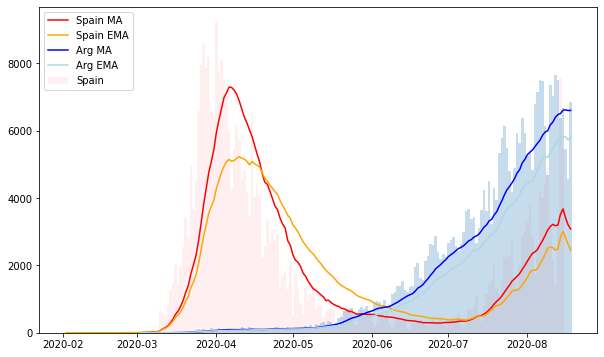

In [9]:
compararArgentinaA('Spain')

# Con relación a Alemania

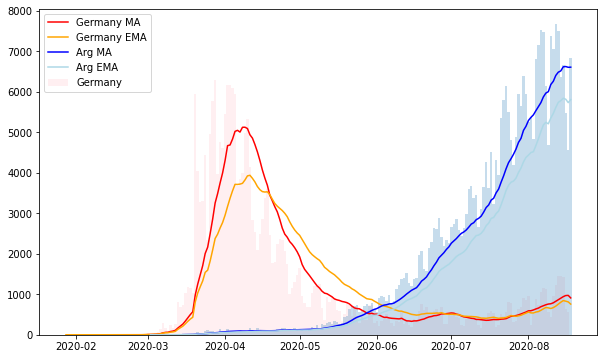

In [10]:
compararArgentinaA('Germany')

# Con relación a Brasil

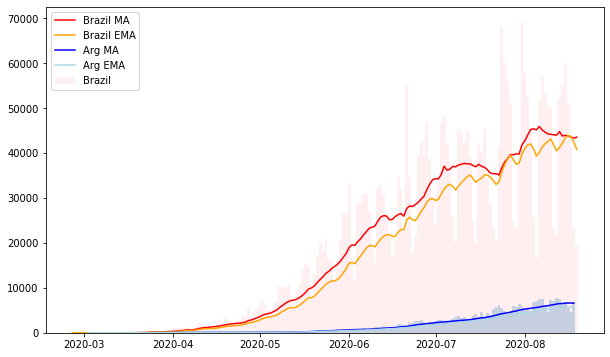

In [11]:
compararArgentinaA('Brazil')

# Con relación a Estados Unidos

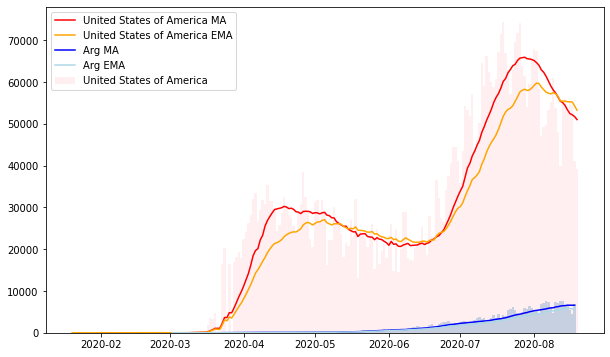

In [12]:
compararArgentinaA('United States of America')